In [3]:
# !pip install colossus

  Obtaining dependency information for colossus from https://files.pythonhosted.org/packages/ff/50/35e063cff35725fcd51f1c6bdb9c072a26934fc676914cfafe7f64d6d02d/colossus-1.3.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.0/205.0 kB 2.0 MB/s eta 0:00:00:00:01


In [34]:
import numpy as np
import matplotlib.pyplot as plt

from colossus.cosmology import cosmology

%matplotlib inline

In [35]:
# Define a cosmology
params = {'H0': 67.66, 'Om0': 0.3111, 'Ob0': 0.0486, 'sigma8': 0.8102, 'ns': 0.9665}
cosmo = cosmology.setCosmology('my_cosmo', params)

# Compute the linear power spectrum at redshift z=0
k = np.logspace(-5, 2, 1000) # Wavenumbers in h / Mpc
P = cosmo.matterPowerSpectrum(k, z=0.0)

# Save the power spectrum to a file
np.savetxt('colossus_generated_data/pk_my_cosmo.txt', np.column_stack([k, P]))

## Understanding the Cosmological Parameters:

- The parameters here are fundamental quantities that describe the properties of our universe:
1. $H_{0}$ is the Hubble constant, which measures the current rate of expansion of the universe. The units are kilometers per second per megaparsec.
2. $\omega_{0}$ is the matter density parameter, which gives the total amount of matter (dark matter + baryonic matter) in the universe as a fraction of the critical density.
3. $\omega_{b}$ is the baryon density parameter, which gives the amount of baryonic matter (normal matter, not dark matter) in the universe as a fraction of the critical density.
4. $\sigma8$ is the `root mean square` (rms) of linear fluctuations within spheres of radius 8 $h^{-1}$ . It's a measure of the amplitude of fluctuations in the matter density field.
5. $n_{s}=0.9672$ is the spectral index, which describes the initial power spectrum of fluctuations in the universe. 
    - A value of 1 corresponds to a scale-invariant spectrum (equal power on all scales), while a value less than 1 indicates more power on large scales.

> These parameters are derived from observations of the cosmic microwave background, galaxy surveys, and other cosmological data. They are the basis for the Lambda-CDM model, which is the current standard model of cosmology.

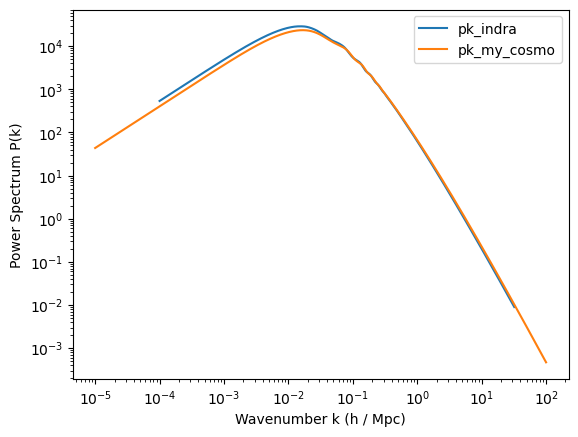

In [36]:
# Load the power spectra
k_indra, P_indra = np.loadtxt('colossus_generated_data/pk_indra7313.txt', unpack=True)
k_my_cosmo, P_my_cosmo = np.loadtxt('colossus_generated_data/pk_my_cosmo.txt', unpack=True)

# Plot the power spectra
plt.loglog(k_indra, P_indra, label='pk_indra')
plt.loglog(k_my_cosmo, P_my_cosmo, label='pk_my_cosmo')

plt.xlabel('Wavenumber k (h / Mpc)')
plt.ylabel('Power Spectrum P(k)')

plt.legend()
plt.show()

- The current standard model of cosmology is often referred to as the `Planck 2018` cosmology. 

- This is because the parameters of this model are based on the results of the Planck satellite mission, which made precise measurements of the cosmic microwave background (CMB). The CMB is the afterglow of the Big Bang, and studying it allows us to determine the composition and geometry of the universe.

- The Planck 2018 cosmology is a type of LambdaCDM cosmology, which assumes that the universe is flat and is dominated by dark energy (represented by the cosmological constant Lambda), with cold dark matter (CDM) being the primary type of matter. The parameters of this cosmology, such as the Hubble constant, the matter density, and the spectral index, have been precisely measured by the Planck satellite.

In [37]:
# Set the cosmology to Planck 2018
cosmo = cosmology.setCosmology('planck18')

# access the parameters
H0 = cosmo.H0
Om0 = cosmo.Om0
Ob0 = cosmo.Ob0
sigma8 = cosmo.sigma8
ns = cosmo.ns

# parameters
print("H0 =", H0)
print("Om0 =", Om0)
print("Ob0 =", Ob0)
print("sigma8 =", sigma8)
print("ns =", ns)

H0 = 67.66
Om0 = 0.3111
Ob0 = 0.049
sigma8 = 0.8102
ns = 0.9665


> The purpose of this script is to explore the functionalities of the `colossus` library, a Python package for cosmology and astrophysics. Specifically, we use `colossus` to generate a power-spectrum file based on a given cosmological model. This power spectrum represents the initial fluctuations in the density of the universe, and is a crucial input for cosmological simulations. 
- By evolving these initial fluctuations forward in time, we can simulate the formation of large-scale structures in the universe, such as galaxies and clusters of galaxies.

## Script Complete